# Google Search Analysis with Python

# Pytrends 

In [31]:
# Install required packages using pip
# This command runs in a Jupyter notebook cell with the ! prefix to access shell commands
!pip install pytrends matplotlib seaborn pandas

# pytrends - Python API for Google Trends
# matplotlib - Plotting library for creating static visualizations
# seaborn - Data visualization library based on matplotlib
# pandas - Data manipulation and analysis library

In [32]:
# Import necessary libraries
import pandas as pd                    # For data manipulation and analysis
from pytrends.request import TrendReq  # Python API for Google Trends
import matplotlib.pyplot as plt        # For creating static, interactive, and animated visualizations
import seaborn as sns                  # Data visualization library based on matplotlib (provides prettier visualizations)
import plotly.express as px            # High-level interface for interactive visualizations with Plotly

# PyTrends Setup aur Keyword Define:

In [33]:
# Initialize the TrendReq object with specific parameters
pytrends = TrendReq(
    hl='en-us',  # Language parameter set to English (US)
    tz=360       # Time zone offset from UTC in minutes (360 = Central Time in US, UTC-6)
)

# Define the search term we want to analyze in Google Trends
keyword = "data science"  # The specific keyword/topic we want to research

# Data Request 

In [34]:
# Build a search query payload for Google Trends
pytrends.build_payload(
    [keyword],       # List of search terms to compare (required parameter)
    cat=0,           # Category to narrow results (0 = all categories)
    timeframe='today 12-m',  # Time range for data (last 12 months)
    geo='',          # Geographic location (empty string = worldwide)
    gprop=''         # Google property to filter to (empty = web searches, can be 'images', 'news', etc.)
)

# Country-wise Interest

In [35]:
# Get interest by region data for our keyword
region_data = pytrends.interest_by_region()  # Retrieves geographic interest data (countries/regions)

# Process the data:
# 1. Sort values in descending order based on our keyword's popularity
# 2. Select only the top 15 regions with highest interest
region_data = region_data.sort_values(by=keyword, ascending=False).head(15)

# Bar Plot Banana (Top Countries):

C:\Users\ranji\AppData\Local\Temp\ipykernel_5292\2670200795.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




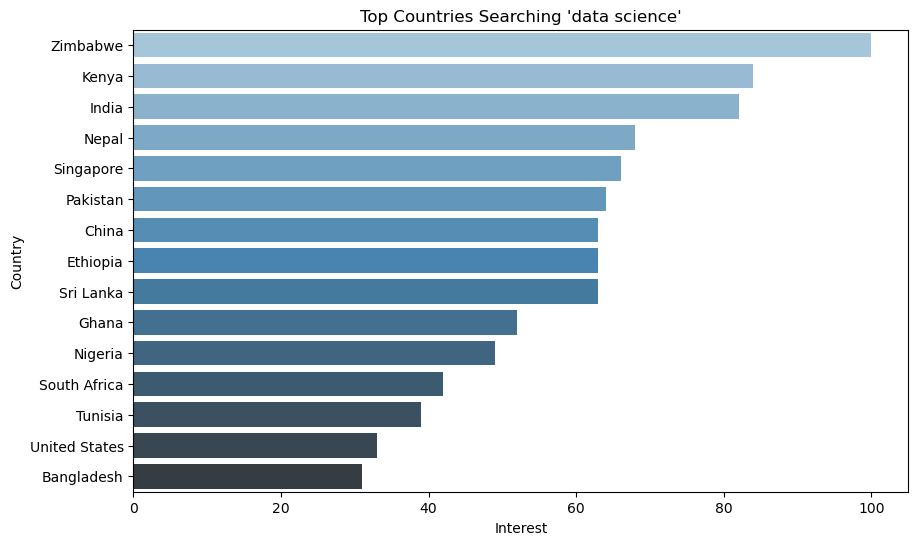

In [36]:
 # Create a visualization of the regional interest data
plt.figure(figsize=(10,6))  # Set the figure size (width=10, height=6 inches)

# Create a horizontal bar chart using seaborn
sns.barplot(
    x=region_data[keyword],  # Values for the bars (interest levels)
    y=region_data.index,     # Labels for the bars (country/region names)
    palette='Blues_d'        # Color palette for the bars (dark blue gradient)
)

# Add chart labels and title
plt.title(f"Top Countries Searching '{keyword}'")  # Dynamic title including the keyword
plt.xlabel("Interest")  # X-axis label (represents search interest)
plt.ylabel("Country")   # Y-axis label (represents countries/regions)

# Display the chart
plt.show()

# Choropleth (World Map Plot):

In [37]:
# Reset the index of the DataFrame to make 'geoName' a regular column
region_data = region_data.reset_index()

# Create an interactive choropleth map using Plotly Express
fig = px.choropleth(
    region_data,                    # Data source
    locations='geoName',            # Column containing country names
    locationmode='country names',   # How to interpret the locations column (as country names)
    color=keyword,                  # Column to determine color intensity (search interest)
    title=f"Search Interest for '{keyword}' by Country",  # Dynamic title with keyword
    color_continuous_scale='Blues'  # Color scale (blue gradient)
)

# Display the interactive map
fig.show()

#  Time-wise Interest 

In [38]:
# Retrieve time-based interest data for our keyword
time_df = pytrends.interest_over_time()  # Returns a DataFrame with dates as index and search interest values over tim

C:\Users\ranji\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



#  Line Plot (Search Trend Over Time)

(array([19905., 19967., 20028., 20089., 20148., 20209., 20270.]),
 [Text(19905.0, 0, '2024-07'),
  Text(19967.0, 0, '2024-09'),
  Text(20028.0, 0, '2024-11'),
  Text(20089.0, 0, '2025-01'),
  Text(20148.0, 0, '2025-03'),
  Text(20209.0, 0, '2025-05'),
  Text(20270.0, 0, '2025-07')])

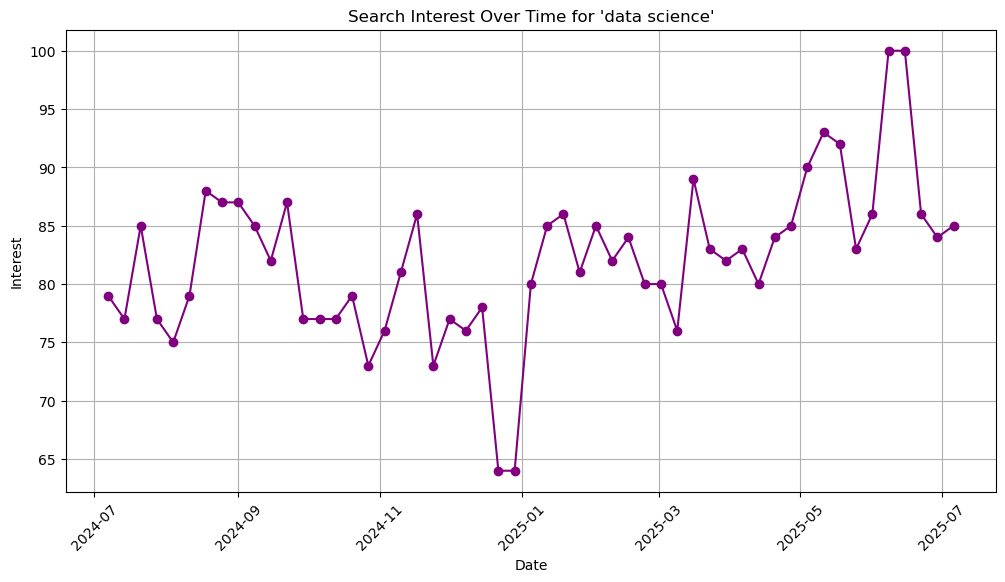

In [39]:
# Create a time series plot for the keyword's search interest
plt.figure(figsize=(12,6))  # Set figure size (width=12, height=6 inches)

# Create the line plot with markers
plt.plot(
    time_df.index,       # X-axis: dates from the DataFrame index
    time_df[keyword],    # Y-axis: interest values for our keyword
    marker='o',          # Add circular markers at each data point
    color='purple'       # Set the line and marker color to purple
)

# Add labels and title
plt.title(f"Search Interest Over Time for '{keyword}'")  # Dynamic title with keyword
plt.xlabel("Date")       # X-axis label
plt.ylabel("Interest")   # Y-axis label

plt.grid(True)           # Add grid lines for better readability
plt.xticks(rotation=45)  # Rotate date labels by 45 degrees to prevent overlap

# Multiple Keywords Compare

In [40]:
# Define a list of related keywords to compare
kw_list = ["artificial intelligence", "data science", "machine learning"]

# Build a search query payload for Google Trends with multiple keywords
pytrends.build_payload(
    kw_list,            # List of multiple search terms to compare
    cat=0,              # Category to narrow results (0 = all categories)
    timeframe='today 12-m',  # Time range for data (last 12 months)
    geo='',             # Geographic location (empty string = worldwide)
    gprop=''            # Google property to filter to (empty = web searches)
)

C:\Users\ranji\anaconda3\Lib\site-packages\pytrends\request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



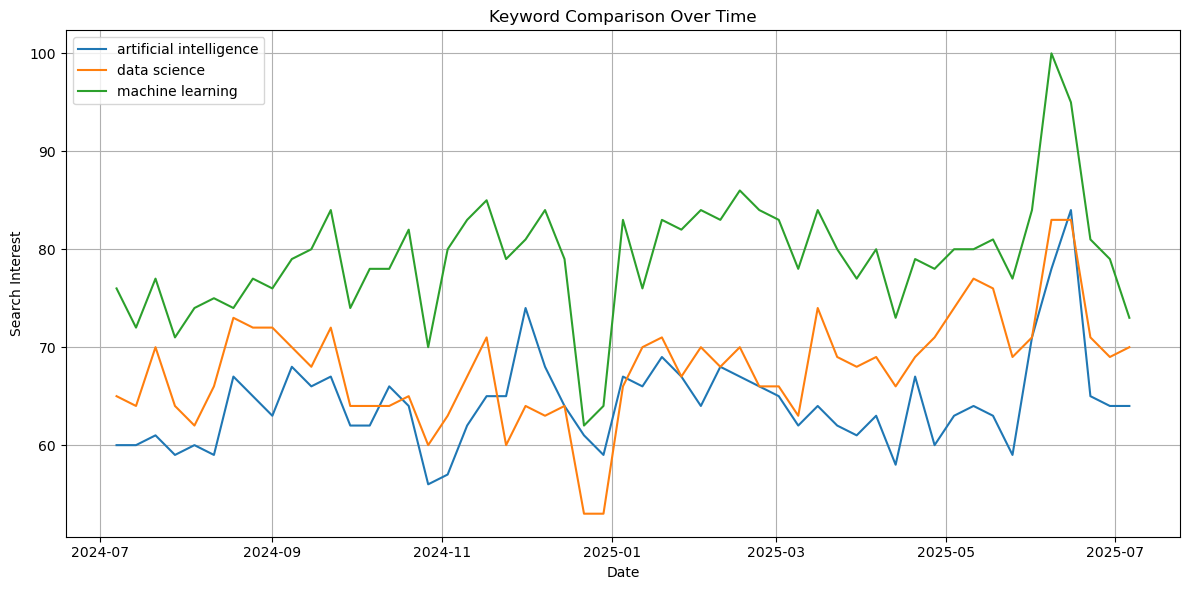

In [41]:
# Get time-based interest data for all keywords in our list
compare_df = pytrends.interest_over_time()

# Create a figure for plotting
plt.figure(figsize=(12,6))  # Set figure size (width=12, height=6 inches)

# Plot each keyword as a separate line
for kw in kw_list:
    plt.plot(
        compare_df.index,  # X-axis: dates from the DataFrame index
        compare_df[kw],    # Y-axis: interest values for current keyword
        label=kw           # Add label for the legend
    )
    
# Add chart elements
plt.title("Keyword Comparison Over Time")  # Chart title
plt.xlabel("Date")                         # X-axis label
plt.ylabel("Search Interest")              # Y-axis label
plt.legend()                               # Add legend to identify each line
plt.grid(True)                             # Add grid lines for better readability
plt.tight_layout()                         # Adjust layout to fit everything nicely

# Display the chart
plt.show()